<p style='text-align:center'>
PSY 394U <b>Methods for fMRI</b>, Fall 2019


<img style='width: 300px; padding: 0px;' src='https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/Placebo_Left.png?raw=true' alt='brain blobs'/>

</p>

<p style='text-align:center; font-size:40px; margin-bottom: 30px;'><b> Machine learning: brief introduction </b></p>

<p style='text-align:center; font-size:18px; margin-bottom: 32px;'><b> November 11, 2019 </b></p>

<hr style='height:5px;border:none' />

# 0. What is machine learning?
<hr style="height:1px;border:none" />

The main goal of **machine learning** is to build (*or to* ***learn***) a predictive model based on available data. Although machine learning is built upon statistical concept, it is different from traditional statistics, where inference and estimation are performed based on known statistical distributions. 

Machine learning is a data-driven approach. Some machine learning methods may work well for some data, but may not work well for other types of data. There is no machine learning method that works well for any data. People usually have to choose a machine learning method that works well for their data (often via trails and errors).

## Supervised v.s. unsupervised learning

In machine learning, a data set consists of **features**, or variables used to make predictions. A data set may also contain the **labels**, the true group assignments or classes. The goal of **supervised learning** is to train a model to predict labels based on the available features. **Classification**, or assignment of observations into distinct categories, is a popular example of supervised learning. 

Supervised learning models are often constructed -- *learned or* ***trained*** -- using a portion of a data set, known as the **training data**. The resulting model is validated using the remaining portion of the data set known as the **testing data**. This framework is necessary to avoid **overfitting**, where the model can predict the training data very accurately but unable to predict on new data sets.

Unlike supervised learning, true labels may not be available for **unsupervised learning**. The goal of unsupervised learning is to find patterns in the data (often without labels). **Clustering**, or finding natural grouping of observations with similar features, is one example of unsupervised learning. **Dimension reduction**, or describing a large number of features with a small number of summary features, is another 

## Glossary of machine learning

Just FYI, there is a glossary of machine learning terms available from Google's [machine learning tutorial](https://developers.google.com/machine-learning/glossary). 


# 1. Simple clustering example
<hr style="height:1px;border:none" />

Now let's take a look at a simple example of clustering. The goal of clustering is to identify grouping of observations based on similarities in features. In this example, we will use **K-means** clustering method.

## Iris data
This is a famous data set with the lengths and widths of the petal and the sepal of 3 different types of irises (Setosa, Versicolour, and Virginica). This is one of example data sets available in **Scikit-learn** (or **`sklearn`**, a popular machine learning library in Python). The data is stored in a 2D array of 150 rows (150 irises) and 4 columns of ***features*** (a.k.a., variables) (sepal length, sepal width, petal length and petal width).

<img style="width: 300px; padding: 0px;" src="https://github.com/sathayas/JupyterfMRIFall2019/blob/master/Images/PCA_Iris.jpg?raw=true" alt="Iris with labels"/>
<p style="text-align:center; font-size:10px; margin-top: 0px;">Source: https://www.math.umd.edu/~petersd/666/html/iris_pca.html </p>

Let's take a look at the data set. First, we generate scatter plots. 

[`<IrisCluster.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/IrisCluster.py)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


# Loading the iris data
iris = datasets.load_iris()
X = iris.data    # Data
y = iris.target  # Target i.e., true clusters
varNames = iris.feature_names  # variable names
targetNames = iris.target_names  # names of irises
nVar = X.shape[1]  # number of features


In [ ]:
%matplotlib inline

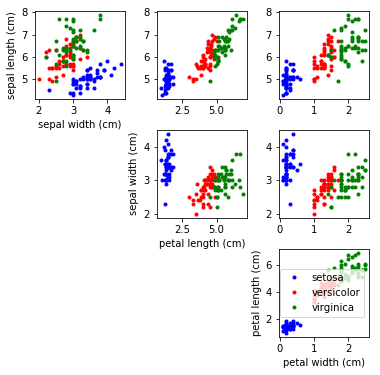

In [15]:
# plotting the data
plt.figure(figsize=[6, 6])

# generating subplots
y_set = list(set(y))
c_points = ['b.','r.','g.']
for iRow in range(nVar-1):  # subplot row index
    for iCol in range(iRow+1, nVar):  # subplot column index
        indPlot = (nVar-1)*iRow + iCol
        plt.subplot(nVar-1, nVar-1, indPlot)
        for iIris in y_set:
            plt.plot(X[y==iIris,iCol], X[y==iIris,iRow],
                     c_points[iIris], label=targetNames[iIris])
        if iCol==iRow+1:
            plt.xlabel(varNames[iCol])
            plt.ylabel(varNames[iRow])
        if iRow==(nVar-2) and iCol==(nVar-1):
            plt.legend()

# adjusting the space between subplots
plt.subplots_adjust(wspace=0.35, hspace=0.35)
plt.show()

## Clustering
For this example, we use the **K-means clustering** method. The K-means clustering splits the data into **K** clusters of similar sizes. This algorithm starts by choosing **K** centroids in the feature space, defining the centers of **K** clusters. Then it assigns each observation to a cluster by minimizing the distance between the observation and a centroid. 

K-means clustering is available in **`sklearn.cluster`** as a transformation object **`KMeans`**. Here, the number of clusters **`n_clusters`** is a *required* parameter. We can use the **`.fit()`** method to fit the data, and cluster assignments can be found as the attribute **`.labels_`**. The coordinates for the centroids can be found as the attribute **`.cluster_centers_`**. 

In [6]:
# K-means clustering
numClus = 3  # number of clusters
km = KMeans(n_clusters=numClus)  # defining the clustering object
km.fit(X)  # actually fitting the data
y_clus = km.labels_   # clustering info resulting from K-means
y_cent = km.cluster_centers_  # centroid coordinates


Now, let's see how well the K-means algorithm worked.

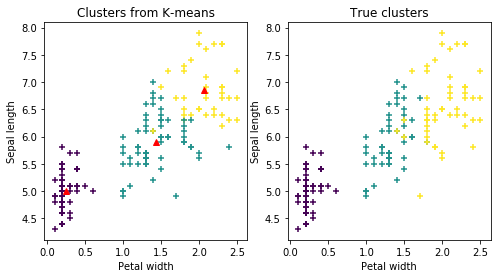

In [7]:
### plotting the clusters
plt.figure(figsize=[8,4])
# First, results from K-means
plt.subplot(121)
plt.scatter(X[:,3],X[:,0],c=y_clus,marker='+')
plt.plot(y_cent[:,3],y_cent[:,0],'r^')  # Ploting centroids
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('Clusters from K-means')

# As a comparison, the true clusters
plt.subplot(122)
plt.scatter(X[:,3],X[:,0],c=y,marker='+')
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('True clusters')

plt.show()


The red triangles indicate the centroids.

# 2. Normalizing data
<hr style="height:1px;border:none" />

In the iris data, you may notice that scales are somewhat different between different features.

[`<IrisClusterNorm.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/IrisClusterNorm.py)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


# Loading the iris data
iris = datasets.load_iris()
X_raw = iris.data    # Data
y = iris.target  # Target i.e., true clusters
varNames = iris.feature_names  # variable names
targetNames = iris.target_names  # names of irises
nVar = X.shape[1]  # number of features


# characteristics of features
pd.DataFrame(X_raw, columns=varNames).describe()


sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

You see that means and SDs are quite different. If features have different magnitudes, then the ones with a large magnitude tend to dominate the outcome. Thus, if features are in different scales, it is a good idea to **normalize** (or **standardize**) the features. This is done by subtracting the mean from each feature, and dividing by its SD. This results in features with mean approximately 0 and SD approximately 1. 

To do so, we can use a transformation object **`StandardScaler`** available in **`sklearn.preprocessing`**.

In [19]:
# standardizing the features
irisNorm = StandardScaler().fit(X_raw)  # learning standardization
X = irisNorm.transform(X_raw)  # transforming the raw features

The first line defines the standardization object named **`irisNorm`**. It learns standardization from the raw features in **`X_raw`** with the **`.fit()`** method. Then the resulting transformation object is used to actually transform the raw features `X_raw` with the **`.transform()`** method. Let's examine the mean and SD of normalized features.

In [20]:
# characteristics of normalized features
pd.DataFrame(X, columns=varNames).describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.468455e-15     -1.823726e-15      -1.610564e-15   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+00     -2.433947e+00      -1.567576e+00   
25%        -9.006812e-01     -5.923730e-01      -1.226552e+00   
50%        -5.250608e-02     -1.319795e-01       3.364776e-01   
75%         6.745011e-01      5.586108e-01       7.627583e-01   
max         2.492019e+00      3.090775e+00       1.785832e+00   

       petal width (cm)  
count      1.500000e+02  
mean      -9.473903e-16  
std        1.003350e+00  
min       -1.447076e+00  
25%       -1.183812e+00  
50%        1.325097e-01  
75%        7.906707e-01  
max        1.712096e+00

As you can see, the means and SDs are comparable among the features. The normalization transformation only changes the scale and center the data; thus it doesn't change the relative relationships among features. When we plot the features, the plots seem very similar to our earlier plots. 

In [21]:
# plotting the data
plt.figure(figsize=[6, 6])

# generating subplots
y_set = list(set(y))
c_points = ['b.','r.','g.']
for iRow in range(nVar-1):  # subplot row index
    for iCol in range(iRow+1, nVar):  # subplot column index
        indPlot = (nVar-1)*iRow + iCol
        plt.subplot(nVar-1, nVar-1, indPlot)
        for iIris in y_set:
            plt.plot(X[y==iIris,iCol], X[y==iIris,iRow],
                     c_points[iIris], label=targetNames[iIris])
        if iCol==iRow+1:
            plt.xlabel(varNames[iCol])
            plt.ylabel(varNames[iRow])
        if iRow==(nVar-2) and iCol==(nVar-1):
            plt.legend()

# adjusting the space between subplots
plt.subplots_adjust(wspace=0.35, hspace=0.35)
plt.show()

Now, let's perform K-means clustering again on the normalized data. 

In [22]:
# K-means clustering
numClus = 3  # number of clusters
km = KMeans(n_clusters=numClus)  # defining the clustering object
km.fit(X)  # actually fitting the data
y_clus = km.labels_   # clustering info resulting from K-means
y_cent = km.cluster_centers_  # centroid coordinates

Visualizing the resulting clusters.

In [23]:
### plotting the clusters
plt.figure(figsize=[8,4])
# First, results from K-means
plt.subplot(121)
plt.scatter(X[:,3],X[:,0],c=y_clus,marker='+')
plt.plot(y_cent[:,3],y_cent[:,0],'r^')  # Ploting centroids
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('Clusters from K-means')

# As a comparison, the true clusters
plt.subplot(122)
plt.scatter(X[:,3],X[:,0],c=y,marker='+')
plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.title('True clusters')

plt.show()

# 3. Evaluating clustering performance
<hr style="height:1px;border:none" />

In a rare circumstance in which you happen to have the information for the true clusters, then you can evaluate how accurate / inaccurate your clustering algorithm results are. A challenge here is that clusters may not be labeled the same in the target and clustering algorithm outcomes. For example, the *Setosa* cluster may be labeled with 0s in the target, but it may be labeled with 1s in the clustering algorithm results. Luckily, there are a number of metrics that can still evaluate the performance of clustering despite the difference in cluster labels. Here are two of those:

  * **Adjusted Rand index (ARI)**:
      * It summarizes the similarity between the cluster labels. 
      * Range: [-1, 1]. 
          * A negative ARI indicates a very bad match (independent labelings). 
          * An ARI close to 1 indicates highly similar clusters. 
          * ARI=1 indicates the perfect match.
  * **Adjusted mutual information (AMI)**:
      * It summarizes the agreement between the cluster labels. 
      * Range: [0, 1]. 
          * An AMI close to 0 indicates a very bad match (independent labelings). 
          * An AMI close to 1 indicates highly similar clusters. 
          * AMI=1 indicates the perfect match.

## Example
Let's compare the iris clustering results (without and with normalization) to the true cluster labels.

[`<ClusterEvalMetrics.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/ClusterEvalMetrics.py)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score


# Loading the iris data
iris = datasets.load_iris()
X_raw = iris.data    # Data
y = iris.target  # Target i.e., true clusters
varNames = iris.feature_names  # variable names
targetNames = iris.target_names  # names of irises
nVar = X.shape[1]  # number of features

# standardizing the features
irisNorm = StandardScaler().fit(X_raw)  # learning standardization
X = irisNorm.transform(X_raw)  # transforming the raw features



# K-means clustering, raw data
numClus = 3  # number of clusters
kmRaw = KMeans(n_clusters=numClus)  # defining the clustering object
kmRaw.fit(X_raw)  # actually fitting the data
yRaw_clus = kmRaw.labels_   # clustering info resulting from K-means


# K-means clustering, normalized data
kmNorm = KMeans(n_clusters=numClus)  # defining the clustering object
kmNorm.fit(X)  # actually fitting the data
yNorm_clus = kmNorm.labels_   # clustering info resulting from K-means

Now ARI.

In [28]:
# ARI
print('ARI (raw)=  %7.4f' % adjusted_rand_score(y, yRaw_clus))
print('ARI (norm)=  %7.4f' % adjusted_rand_score(y, yNorm_clus))

ARI (raw)=   0.7302
ARI (norm)=   0.6201


Looks like clustering performed poorly on the normalized data. Now AMI.

In [29]:
# AMI
print('AMI (raw)=  %7.4f' % adjusted_mutual_info_score(y, yRaw_clus))
print('AMI (norm)=  %7.4f' % adjusted_mutual_info_score(y, yNorm_clus))

AMI (raw)=   0.7484
AMI (norm)=   0.6549


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


# 4. Number of clusters
<hr style="height:1px;border:none" />

Many clustering methods often requires the number of clusters as the required parameter. However, *we don't always know how many clusters are in our data.* If we don't know the number of clusters, then we estimate the number of clusters from the data before clustering.

## Data
The data set for this example, **`wiscsem.txt`** consists of the Weschler Intelligence Scale for Children (WISC) of 175 children. There are 11 features in this data set.

 * `info`: Information
 * `comp`: Comprehension
 * `arith`: Arithmetic
 * `simil`: Similarities
 * `vocab`: Vocabulary
 * `digit`: Digit Span
 * `pictcomp`: Picture Completion
 * `parang`: Paragraph Arrangement
 * `block`: Block Design
 * `object`: Object Assembly
 * `coding`: Coding
 
<p style="text-align:center; font-size:10px; margin-top: 12px; margin-bottom: 12px;"> 
Source: Tabachnick & Fidell, <i>Using Multivariate Statistics</i>, 6th Ed. Pearson. <a href='http://media.pearsoncmg.com/ab/ab_tabachnick_multistats_6/datafiles/ASCII/wiscsem.dat'> Link to the original data</a> </p>

We are interested in seeing if there are any clusters of children with similar WISC outcomes. 

To do so, let's load the data first.

[`<WiscCluster.py>`](https://github.com/sathayas/fMRIClassFall2019/blob/master/MachineLearning/WiscCluster.py)

In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# loadin the data
wiscData = pd.read_csv(os.path.join('DataML','wiscsem.txt'), sep='\t')
wiscFeatures = np.array(wiscData.iloc[:,2:13])
featureNames = np.array(wiscData.columns[2:13])

## Scree plot
One way we can determine the number of clusters is to plot the *sum of squared distances from cluster centroids (i.e., how far observations are from the centrolids)*, also known as the **inertia**. We can get the inertia by the attribute **`.inertia_`** of the clustering object. 

We run the K-means algorithm with different numbers of clusters, and calculate the corresponding inertiae. Then we plot the inertiae against the number of clusters. The inertia decreases as the number of clusters increases. However, there is an *elbow* in this plot where the rate of decrease slows down. The elbow is the point of compromise; adding more clusters does not decrease the inertia dramatically. Just FYI, this type of plot is known as a **scree plot**. It is commonly used in multivariate statistics and machine learning to determine the number of variables / factors / features to be used in an analysis. 

In this particular example, we calculate the inertia up to 20 clusters.

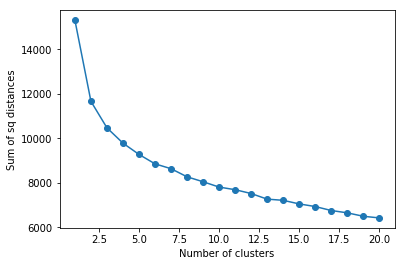

In [33]:
# determinging the number of clusters (up to 20 clusters)
SSE = []
for iClus in range(1,21):
    # K-means clustering
    km = KMeans(n_clusters=iClus)  # K-means with a given number of clusters
    km.fit(wiscFeatures)  # fitting the principal components
    SSE.append(km.inertia_) # recording the sum of square distances

# plotting the sum of square distance
plt.plot(np.arange(1,21),SSE,marker = "o")
plt.xlabel('Number of clusters')
plt.ylabel('Sum of sq distances')
plt.show()

The selection of the elbow location is somewhat subjective. In this example, 3 clusters seem reasonable for this data set. So we will re-run K-means with 3 clusters.

## Clustering and results

In [34]:
## We will go with 3 clusters
# K-means clustering again
km = KMeans(n_clusters=3)
km.fit(wiscFeatures)  # fitting the principal components
y_clus = km.labels_   # clustering info resulting from K-means

Let's examine the resulting clusters by plotting some of the features with the cluster information.

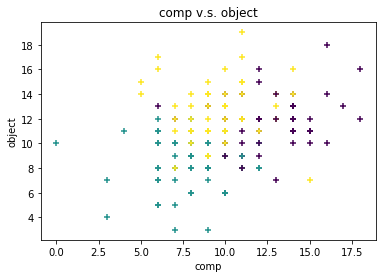

In [48]:
### plotting the clusters
# with two of the features
xFeature = 1 # index for the feature on the x-axis
yFeature = 9 # index for the feature on the y-axis
plt.scatter(wiscFeatures[:,xFeature],
            wiscFeatures[:,yFeature],c=y_clus,marker='+')
plt.xlabel(featureNames[xFeature])
plt.ylabel(featureNames[yFeature])
plt.title(featureNames[xFeature] + ' v.s. ' + featureNames[yFeature])
plt.show()


* Dynamic connectivity, resting-state fMRI
* Other clustering algorithms
